# Applying Advanced Transformations (Core)
---

Author: Jackson Muehlbauer

Date: 3/2/2023

In [10]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

In [11]:
# Load data
info = pd.read_csv('Data/superhero_info - superhero_info.csv')
powers = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

display(info.head())
display(powers.head())

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [16]:
display(info.info())
display(powers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


None

In [12]:
# get example Hero|Publisher
hp = info.loc[0,'Hero|Publisher']
hp

'A-Bomb|Marvel Comics'

In [13]:
#split
hp = hp.split('|')
hp

['A-Bomb', 'Marvel Comics']

In [26]:
# split string on |
info[['Hero', 'Publisher']] = info['Hero|Publisher'].str.split('|', expand = True)
info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [27]:
info = info.drop(columns = ['Hero|Publisher'])
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [28]:
info['Gender'].value_counts()

Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64

In [29]:
# slice example of measurements
m = info.loc[0, 'Measurements']
m

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [30]:
# define a function

def fix_string_dict(col_name, df):
    # use .str.replace to replace all single quotes
    df[col_name] = df[col_name].str.replace("'", '"')
    # Apply the json.loads to the full column
    df[col_name] = df[col_name].apply(json.loads)
    # Unpack dictionary
    unpacked = df[col_name].apply(pd.Series)
    # concat to df
    df = pd.concat([df, unpacked], axis = 1)
    return df

In [31]:
info = fix_string_dict(col_name = 'Measurements', df = info)
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [32]:
# Split number from units, Height
info[['Height', 'Height_Units']] = info['Height'].str.split(' ', expand = True)
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight,Height_Units
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0 kg,cm
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0 kg,cm
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0 kg,cm
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0 kg,cm
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0 kg,cm


In [33]:
# Split number from units, Weight
info[['Weight', 'Weight_Units']] = info['Weight'].str.split(' ', expand = True)
display(info.head())
display(info.info())


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight,Height_Units,Weight_Units
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0,cm,kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0,cm,kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0,cm,kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0,cm,kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0,cm,kg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
 9   Height        463 non-null    object
 10  Weight        463 non-null    object
 11  Height_Units  463 non-null    object
 12  Weight_Units  463 non-null    object
dtypes: object(13)
memory usage: 47.1+ KB


None

In [34]:
# cast to floats
info['Height'] = info['Height'].astype(float)
info['Weight'] = info['Weight'].astype(float)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        463 non-null    object 
 1   Race          463 non-null    object 
 2   Alignment     463 non-null    object 
 3   Hair color    463 non-null    object 
 4   Eye color     463 non-null    object 
 5   Skin color    463 non-null    object 
 6   Measurements  463 non-null    object 
 7   Hero          463 non-null    object 
 8   Publisher     463 non-null    object 
 9   Height        463 non-null    float64
 10  Weight        463 non-null    float64
 11  Height_Units  463 non-null    object 
 12  Weight_Units  463 non-null    object 
dtypes: float64(2), object(11)
memory usage: 47.1+ KB


In [35]:
# drop unwanted
info = info.drop(columns = ['Measurements', 'Height_Units', 'Weight_Units'])
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


Info Dataframe looks to be completed

In [36]:
# check powers
powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [37]:
# slice example of powers list
p = powers.loc[0, 'Powers']
print(p)
print(type(p))

Agility,Super Strength,Stamina,Super Speed
<class 'str'>


In [38]:
# split string into list
p = p.split(',')
p

['Agility', 'Super Strength', 'Stamina', 'Super Speed']

In [39]:
powers['Powers_list'] = powers['Powers'].str.split(',')
powers.head()

,hero_names,Powers,Powers_list
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [50]:
p.__contains__('Agility')

True

In [51]:
# function that one-hot-encodes a list column
def ohe_list_column(col_name, df):
    exploded = df.explode(col_name)
    cols_to_make = exploded[col_name].dropna().unique()
    for col in cols_to_make:
        print(col)
        df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
    return df

In [52]:
powers = ohe_list_column(col_name = 'Powers_list', df = powers)
powers.head()

Agility
Super Strength
Stamina
Super Speed
Accelerated Healing
Durability
Longevity
Camouflage
Self-Sustenance
Cold Resistance
Underwater breathing
Marksmanship
Weapons Master
Intelligence
Telepathy
Immortality
Reflexes
Enhanced Sight
Sub-Mariner
Lantern Power Ring
Invulnerability
Animation
Super Breath
Dimensional Awareness
Flight
Size Changing
Teleportation
Magic
Dimensional Travel
Molecular Manipulation
Energy Manipulation
Power Cosmic
Energy Absorption
Elemental Transmogrification
Fire Resistance
Natural Armor
Heat Resistance
Matter Absorption
Regeneration
Stealth
Power Suit
Energy Blasts
Energy Beams
Heat Generation
Danger Sense
Phasing
Force Fields
Hypnokinesis
Invisibility
Enhanced Senses
Jump
Shapeshifting
Elasticity
Substance Secretion
Enhanced Hearing
Adaptation
Gliding
Natural Weapons
Wallcrawling
Vision - Thermal
Power Augmentation
Cryokinesis
Duplication
Weapon-based Powers
Fire Control
Enhanced Memory
Energy Constructs
Power Absorption
Time Travel
Enhanced Smell
Water Con

/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

Sonic Scream
Peak Human Condition
Vision - Infrared
Dexterity
Omnitrix


/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

Omnipotent
Possession
Energy Resistance
Vision - Cryo
Mind Control
Mind Blast
Clairvoyance
Probability Manipulation
Death Touch
Electrokinesis
Gravity Control
Technopath/Cyberpath
Radar Sense


/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

Astral Projection
Cloaking
Telepathy Resistance
Mind Control Resistance
Hyperkinesis
Spatial Awareness
Radiation Control
Radiation Absorption
Magic Resistance
Element Control
Plant Control
Terrakinesis
Power Sense
Wind Control


/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

Qwardian Power Ring
Echolocation
Resurrection
The Force
Summoning
Banish
Molecular Dissipation
Electrical Transport
Speed Force
Grim Reaping
Portal Creation
Vitakinesis
Projection
Insanity
Photographic Reflexes
Anti-Gravity
Thirstokinesis
Power Nullifier
Weather Control
Omnipresent
Omniscient
Hair Manipulation
Nova Force
Odin Force
Phoenix Force
Intuitive aptitude
Melting
Changing Armor


/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df[col_name].apply(lambda x: ' '.join(x).__contains__(col))
/var/folders/8k/75t3_8pj0v32jr8dhb7x00nw0000gn/T/ipykernel_37001/1343692118.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

,hero_names,Powers,Powers_list,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
powers = powers.drop(columns = ['Powers', 'Powers_list'])
powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
merged = pd.merge(info, powers, left_on = "Hero", right_on = "hero_names", how = 'inner')
merged

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0,...,False,False,False,False,False,False,False,False,False,False
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0,...,False,False,False,False,False,False,False,False,False,False
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0,...,False,False,False,False,False,False,False,False,False,False
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0,...,True,False,False,False,False,False,False,False,False,False


In [57]:
merged = merged.drop(columns = ['hero_names'])
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


## Use the combined Dataframe to answer the following questions

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

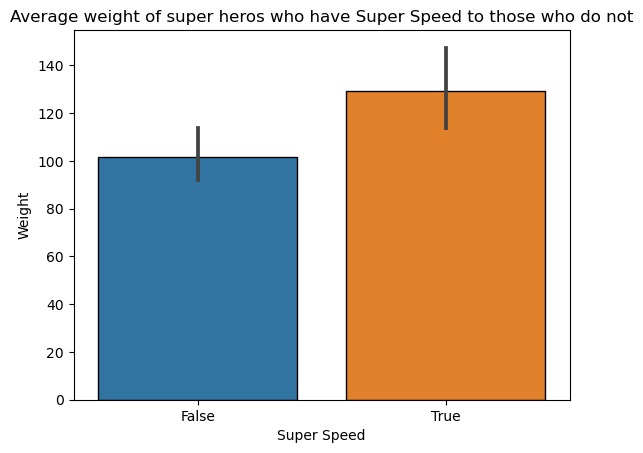

In [60]:
# Compare the average weight of super powers who have Super Speed to those who do not.

sns.barplot(data = merged, x = 'Super Speed', y = 'Weight', edgecolor = 'k');
plt.title('Average weight of super heros who have Super Speed to those who do not')
merged.groupby('Super Speed')['Weight'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

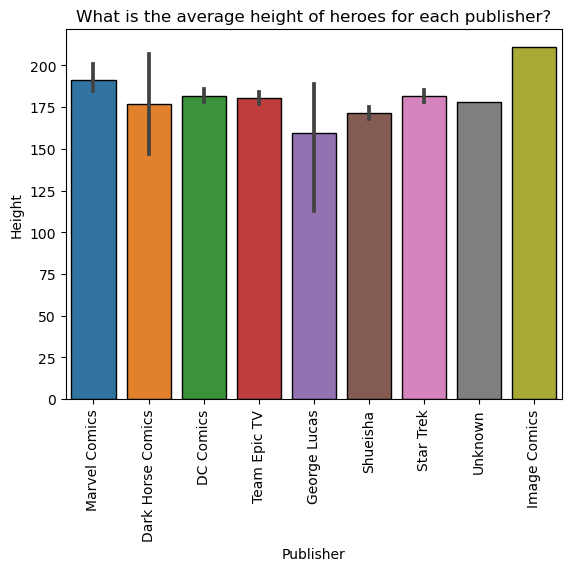

In [62]:
# What is the average height of heroes for each publisher?

sns.barplot(data = merged, x = 'Publisher', y = 'Height', edgecolor = 'k');
plt.title('What is the average height of heroes for each publisher?');
plt.xticks(rotation = 90)
merged.groupby('Publisher')['Height'].mean()